<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework04/blob/main/Temperature_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c345b6e5890fa5ac67c3ef1d5d09849f06cadd54f8e8d0e97fed7b5b0699bb5f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
universe = np.linspace(0,40,200) 
universe1 = np.linspace(0,100,200)
universe2 = np.linspace(0,100,200)
temperature = ctrl.Antecedent(universe, 'temperature')
humid = ctrl.Antecedent(universe1, 'humid')
fan_spd = ctrl.Consequent(universe2, 'fan_spd')

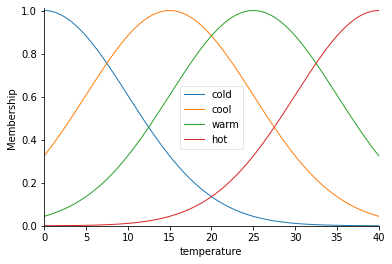

In [5]:
temperature['cold'] = fuzzy.gaussmf(temperature.universe,0,10)
temperature['cool'] = fuzzy.gaussmf(temperature.universe,15,10)
temperature['warm'] = fuzzy.gaussmf(temperature.universe,25,10)
temperature['hot'] = fuzzy.gaussmf(temperature.universe,40,10)
temperature.view()

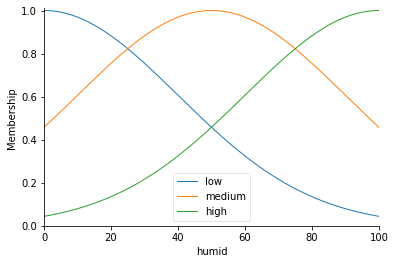

In [6]:
humid['low'] = fuzzy.gaussmf(humid.universe,0,40)
humid['medium'] = fuzzy.gaussmf(humid.universe,50,40)
humid['high'] = fuzzy.gaussmf(humid.universe,100,40)
humid.view()

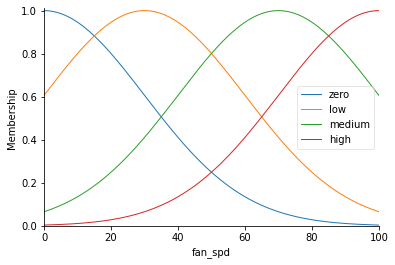

In [9]:
fan_spd['zero'] = fuzzy.gaussmf(fan_spd.universe,0,30)
fan_spd['low'] = fuzzy.gaussmf(fan_spd.universe,30,30)
fan_spd['medium'] = fuzzy.gaussmf(fan_spd.universe,70,30)
fan_spd['high'] = fuzzy.gaussmf(fan_spd.universe,100,30)
fan_spd .view()

In [12]:
rule = []
rule.append(ctrl.Rule(antecedent=((temperature['cool']&humid['high'])|(temperature['cold']&humid['medium'])|(temperature['cold']&humid['low'])), consequent= fan_spd['medium']))                        
rule.append(ctrl.Rule(antecedent=((temperature['warm']&humid['high'])|(temperature['cool']&humid['medium'])|(temperature['cool']&humid['low'])), consequent= fan_spd['low']))                     
rule.append(ctrl.Rule(antecedent=((temperature['hot']&humid['high'])|(temperature['warm']&humid['medium'])|(temperature['hot']&humid['medium'])|(temperature['hot']&humid['medium'])| (temperature['hot']&humid['medium'])|(temperature['warm']&humid['low'])), consequent= fan_spd['zero']))                                                                   
rule.append(ctrl.Rule(antecedent=((temperature['cold']&humid['high'])), consequent= fan_spd['high']))

<ipython-input-33-28181ae6896f>:19: UserWarning: The following kwargs were not used by contour: 'anpha'
  view_z = ax.contourf(x,y,z, zdir= 'z', offset= 25, cmap= 'viridis', anpha= 0.5)
<ipython-input-33-28181ae6896f>:20: UserWarning: The following kwargs were not used by contour: 'anpha'
  view_x = ax.contourf(x,y,z, zdir= 'x', offset= -3, cmap= 'viridis', anpha= 0.5)
<ipython-input-33-28181ae6896f>:21: UserWarning: The following kwargs were not used by contour: 'anpha'
  view_y = ax.contourf(x,y,z, zdir= 'y', offset= -5, cmap= 'viridis', anpha= 0.5)


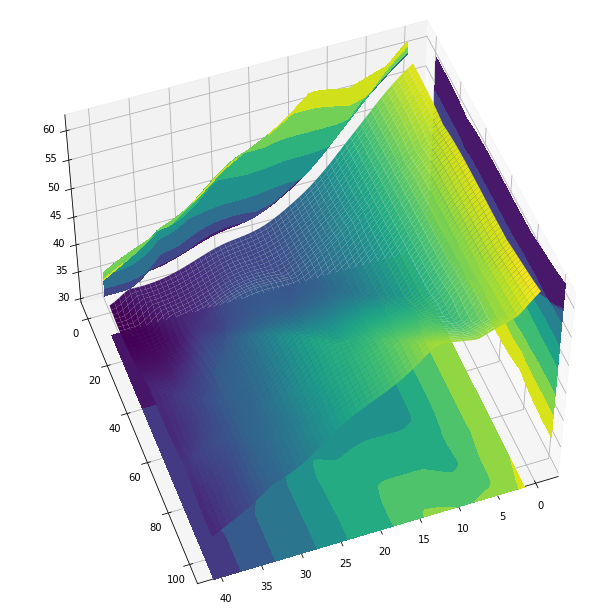

In [33]:
System  = ctrl.ControlSystem(rule)
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,40,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['temperature']= x[i,j]
    sim.input['humid']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan_spd']

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',linewidth= 0.4, antialiased= True)
                      
view_z = ax.contourf(x,y,z, zdir= 'z', offset= 25, cmap= 'viridis', anpha= 0.5)
view_x = ax.contourf(x,y,z, zdir= 'x', offset= -3, cmap= 'viridis', anpha= 0.5)
view_y = ax.contourf(x,y,z, zdir= 'y', offset= -5, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,70)